In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [16]:
data = pd.read_csv(r'C:\Users\akhil\Desktop\python projects\diabetes.csv')
data.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
data.shape

(768, 9)

In [18]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [51]:

data.groupby('Outcome').median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2,107,70,21,39,30.05,0.336,27
1,4,140,74,27,0,34.25,0.449,36


In [14]:
preg_proportion = np.array(data['Pregnancies'].value_counts())
preg_month = np.array(data['Pregnancies'].value_counts().index)
preg_proportion_perc = np.array(np.round(preg_proportion/sum(preg_proportion),3)*100,dtype=int)

In [15]:
preg = pd.DataFrame({'month':preg_month,'count_of_preg_prop':preg_proportion,'percentage_proportion':preg_proportion_perc})
preg.set_index(['month'],inplace=True)
preg.head(10)

,count_of_preg_prop,percentage_proportion
month,,
1,135,17
0,111,14
2,103,13
3,75,9
4,68,8
5,57,7
6,50,6
7,45,5
8,38,4


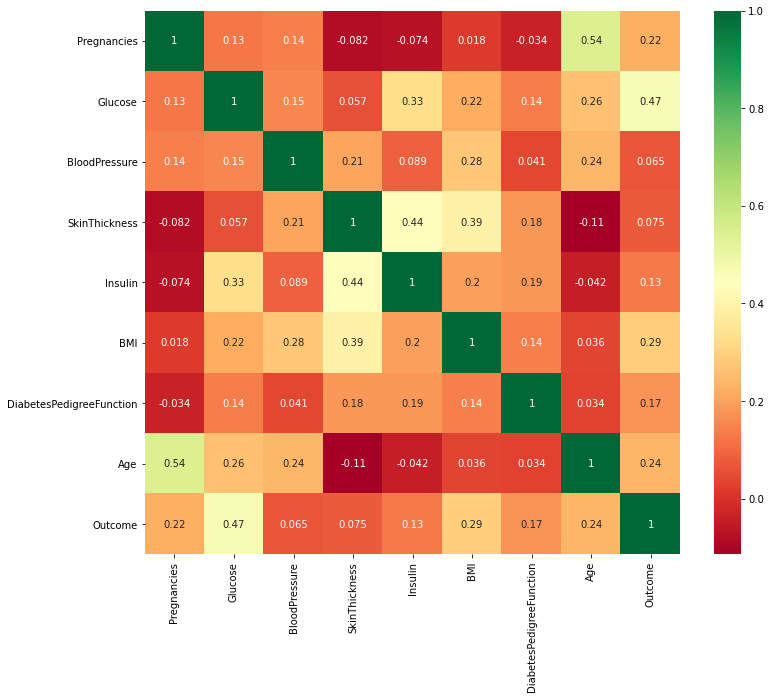

In [19]:
plt.figure(figsize=(12,10))
p= sns.heatmap(data.corr(),annot= True,cmap='RdYlGn') #confusion matrix 

In [25]:
data.head(1)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1


Text(0.5, 1.0, 'Womens have diabetes')

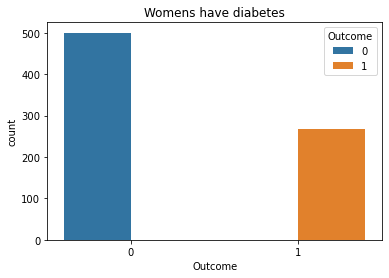

In [20]:
sns.countplot(data=data,x='Outcome',hue='Outcome')
plt.title('Womens have diabetes')

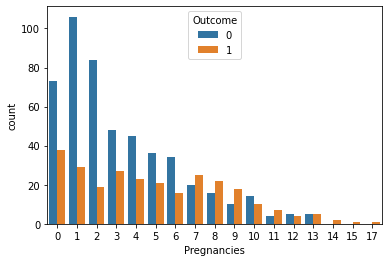

In [22]:
sns.countplot(data=data,x='Pregnancies',hue='Outcome')

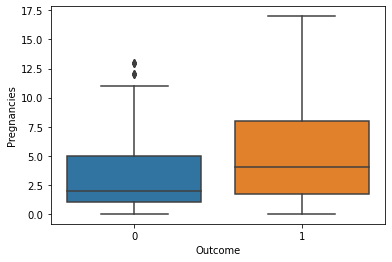

In [27]:
sns.boxplot(x= data['Outcome'],y=data['Pregnancies'])

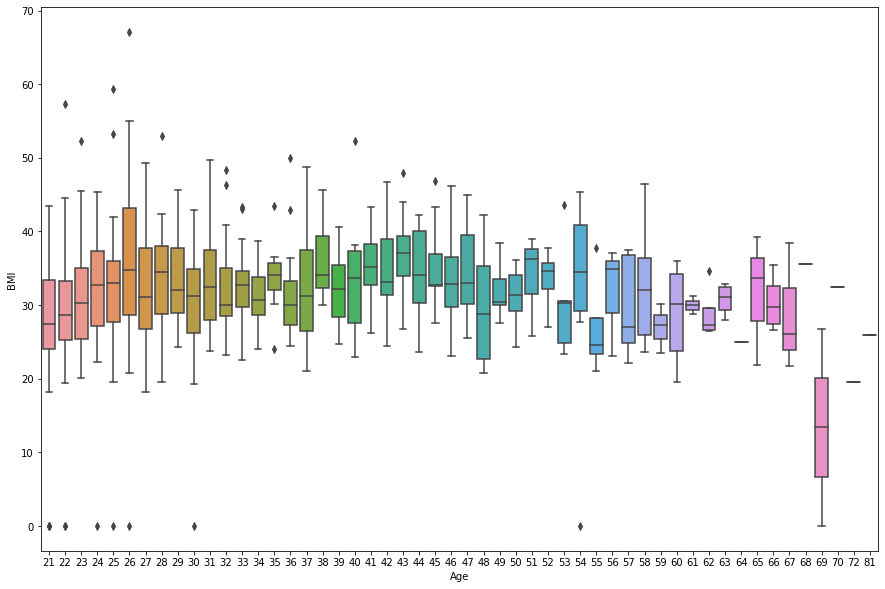

In [38]:
plt.subplots(figsize=(15,10))
sns.boxplot(x='Age', y='BMI', data=data)
plt.show()

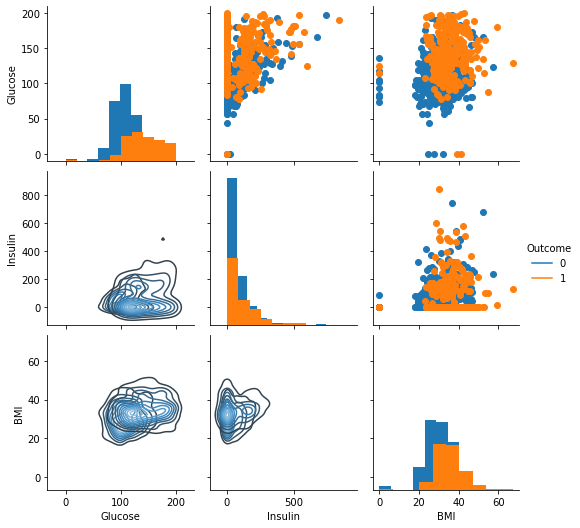

In [41]:
g = sns.PairGrid(data, vars=['Glucose', 'Insulin', 'BMI'], hue="Outcome", size=2.4)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

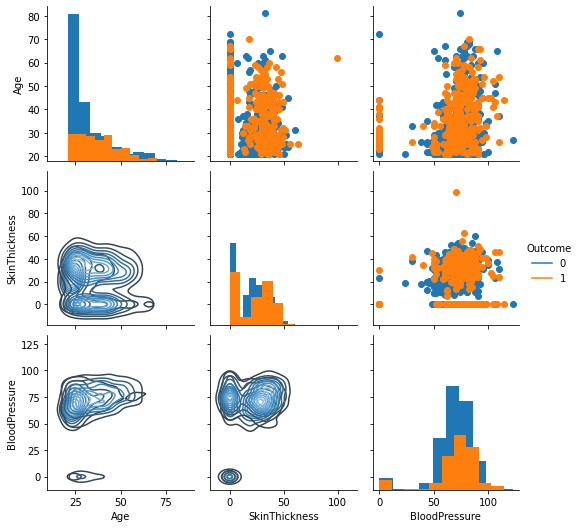

In [42]:
g = sns.PairGrid(data, vars=['Age', 'SkinThickness', 'BloodPressure'], hue="Outcome", size=2.4)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.add_legend()
plt.show()

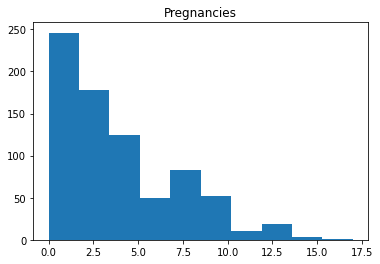

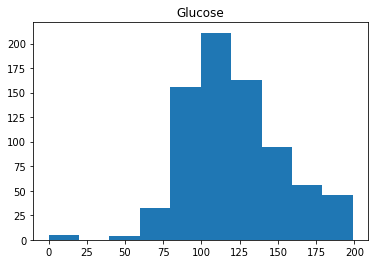

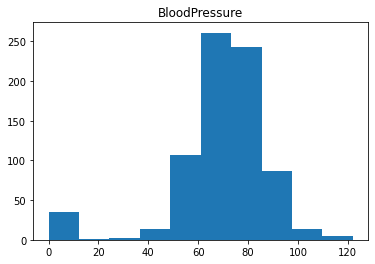

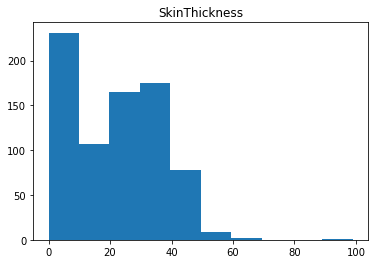

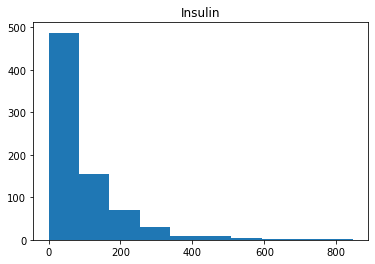

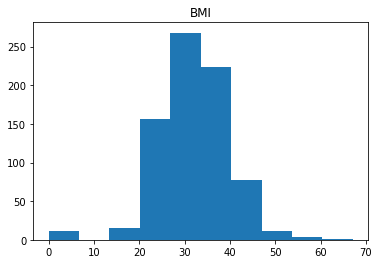

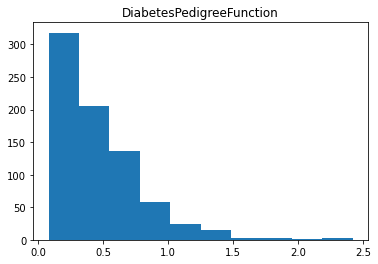

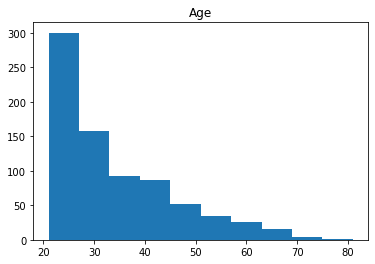

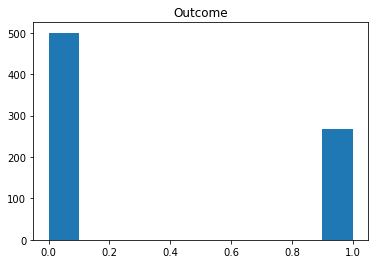

In [28]:
for i in data.columns:
  plt.figsize=(12,10)
  plt.hist(data[i])
  plt.title(i)
  plt.show()
#multivariate analysis

Joint plot of Glucose with Other Variables ==> 

Correlation between Glucose and Pregnancies ==>  0.129458671499273


<Figure size 500x400 with 0 Axes>

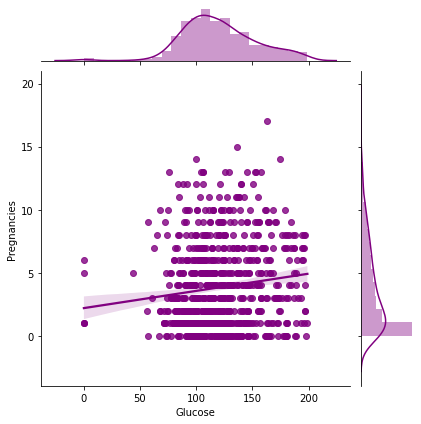

Correlation between Glucose and BloodPressure ==>  0.15258958656866448


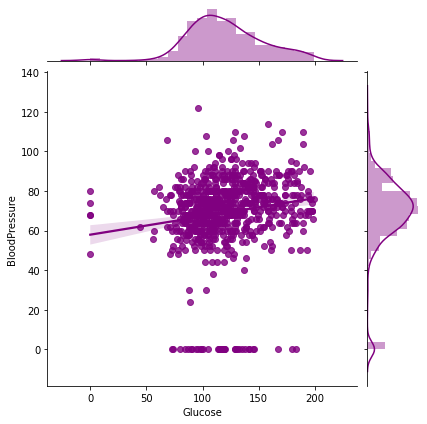

Correlation between Glucose and SkinThickness ==>  0.057327890738176825


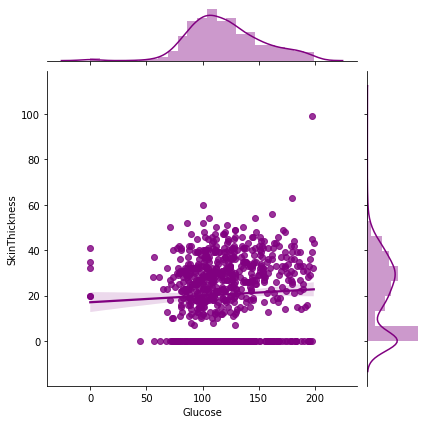

Correlation between Glucose and Insulin ==>  0.3313571099202081


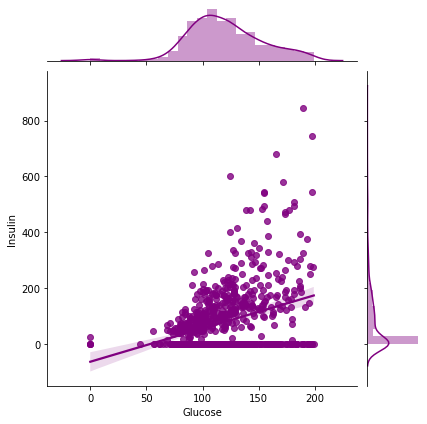

Correlation between Glucose and BMI ==>  0.22107106945898305


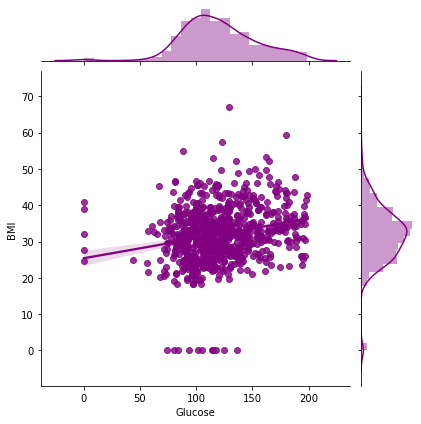

Correlation between Glucose and DiabetesPedigreeFunction ==>  0.1373372998283708


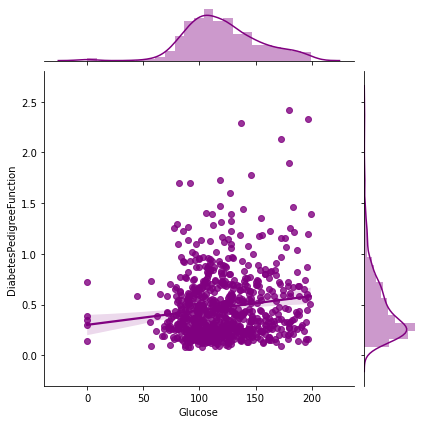

Correlation between Glucose and Age ==>  0.26351431982433376


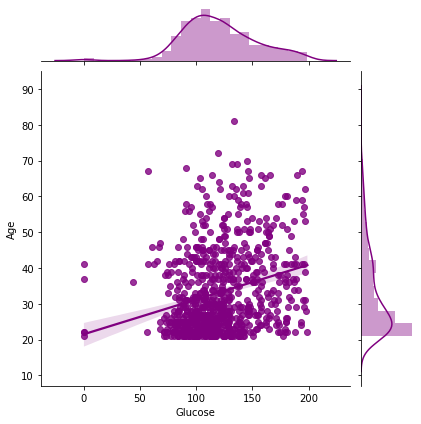

In [29]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of Glucose with Other Variables ==> \n")
for i in  data.columns:
    if i != 'Glucose' and i != 'Outcome':
        print(f"Correlation between Glucose and {i} ==> ",data.corr().loc['Glucose'][i])
        sns.jointplot(x='Glucose',y=i,data=data,kind = 'reg',color = 'purple')
        plt.show()

Joint plot of  with Other Variables ==> 

Correlation between BloodPressure and Pregnancies ==>  0.14128197740714024


<Figure size 500x400 with 0 Axes>

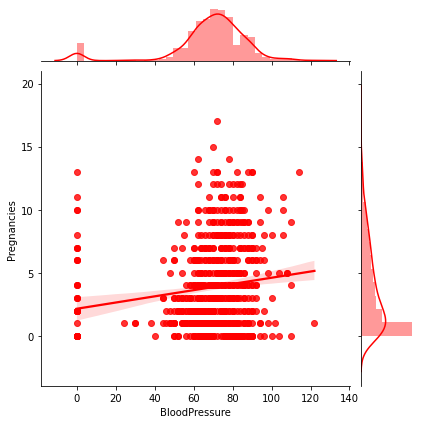

Correlation between BloodPressure and Glucose ==>  0.15258958656866448


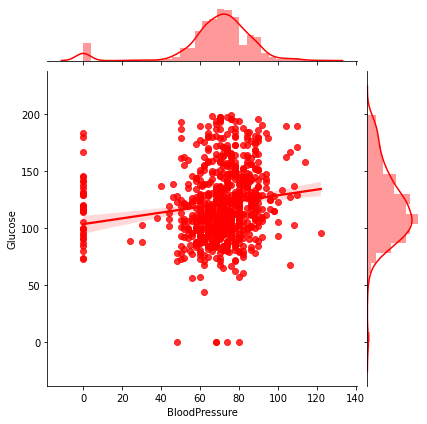

Correlation between BloodPressure and SkinThickness ==>  0.2073705384030703


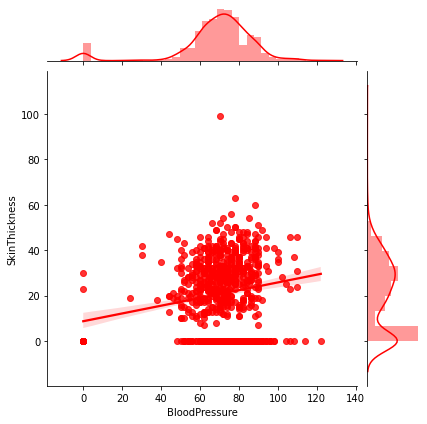

Correlation between BloodPressure and Insulin ==>  0.08893337837319296


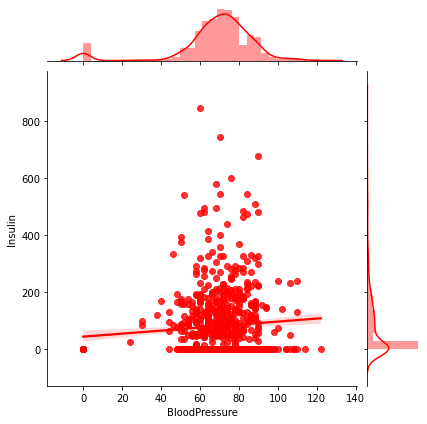

Correlation between BloodPressure and BMI ==>  0.28180528884991074


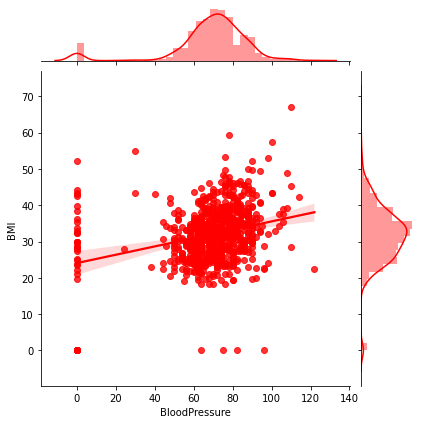

Correlation between BloodPressure and DiabetesPedigreeFunction ==>  0.04126494793009854


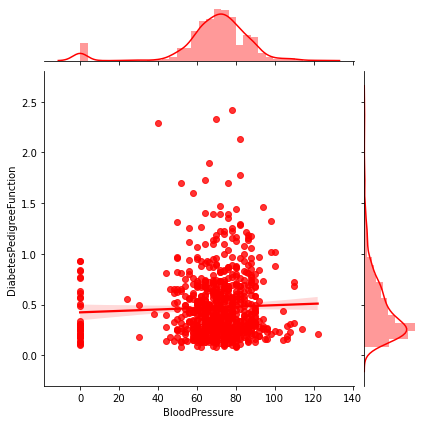

Correlation between BloodPressure and Age ==>  0.23952794642136382


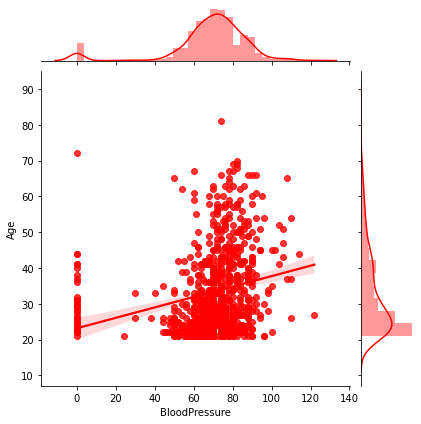

In [43]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of  with Other Variables ==> \n")
for i in  data.columns:
    if i != 'BloodPressure' and i != 'Outcome':
        print(f"Correlation between BloodPressure and {i} ==> ",data.corr().loc['BloodPressure'][i])
        sns.jointplot(x='BloodPressure',y=i,data=data,kind = 'reg',color = 'red')
        plt.show()

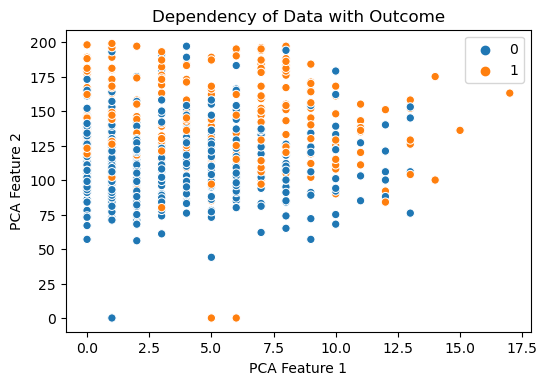

In [44]:
x= data.iloc[:,:-1].values
y= data.iloc[:,-1].values

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(x)

x_new = pca.transform(x)

xs = x[:,0]
ys = x[:,1]

plt.figure(dpi=100)
sns.scatterplot(x=xs,y=ys,hue=y).set_title('Dependency of Data with Outcome')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [46]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
log_clf = LogisticRegression()
svm_clf = SVC()
tree_clf = DecisionTreeClassifier( max_depth=4, criterion='gini')
voting_clf = VotingClassifier(
estimators=[('lr', log_clf), ('svc', svm_clf), ('tree', tree_clf)],
voting='hard')
voting_clf.fit(x_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()), ('svc', SVC()),
                             ('tree', DecisionTreeClassifier(max_depth=4))])

In [47]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, svm_clf,tree_clf, voting_clf):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8246753246753247
SVC 0.7922077922077922
DecisionTreeClassifier 0.7662337662337663
VotingClassifier 0.8051948051948052


In [56]:
from sklearn.ensemble import BaggingClassifier

BaggingClassifier?


In [57]:
bag = BaggingClassifier(
    max_samples=.5, 
    max_features=2, 
    n_jobs=2,
    oob_score=True)

In [58]:
bag.fit(x,y)

BaggingClassifier(max_features=2, max_samples=0.5, n_jobs=2, oob_score=True)

In [60]:
bag.score(x, y)

0.9036458333333334

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

GradientBoostingClassifier?

In [63]:
m = GradientBoostingClassifier(n_estimators=10)

m.fit(x, y)

m.score(x, y)

0.7942708333333334

In [64]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoostClassifier?

In [65]:
m = AdaBoostClassifier(base_estimator=None, n_estimators=100)

In [67]:
m.fit(x,y)

AdaBoostClassifier(n_estimators=100)

In [68]:
m.score(x, y)

0.8385416666666666